# Assignment II: Clustering

In [18]:
import pandas as pd

## Data: Credit Card User Data
For this assignment, we use credit card data from 9000 users. Source: https://www.kaggle.com/arjunbhasin2013/ccdata

In [2]:
#get the data
!git clone https://github.com/keuperj/DATA.git

Cloning into 'DATA'...
remote: Enumerating objects: 126, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 126 (delta 11), reused 39 (delta 11), pack-reused 87
Receiving objects: 100% (126/126), 185.56 MiB | 24.95 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (86/86), done.


In [55]:
data = pd.read_csv("DATA/CC GENERAL.csv")

In [56]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Task 1: clean the data and perform a basic EDA
* check for missing values and NAN
* compute basic statistics
* check for carrelations in the data

In [57]:
data = data.interpolate(method="linear")
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.533869,1733.143852,865.273312,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.621176,2895.063757,2346.488647,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.002544,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,319.202163,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,832.048526,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [58]:
data.corr()

<ipython-input-58-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531249,0.322802,0.391514,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095725,0.065008,0.112239,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356947,0.603264,0.093090,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319712,0.567292,0.048326,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256485,0.384084,0.131183,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303973,0.453238,0.138145,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119750,0.103464,0.003636,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295014,0.243537,-0.029420,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060731,0.085551,0.029899,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132619,0.183192,0.096889,-0.249773,-0.133372


### Task 2: Cluster the creditcard users into sub-groups. Perform a statistical analysis of these groups.
* use a Scikit-Learn clustering *K-Means* and *DBSCAN* clustering to group the users
* analyze the key differences between the user groups: use simple statistics

In [59]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture, metrics, preprocessing
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler, normalize

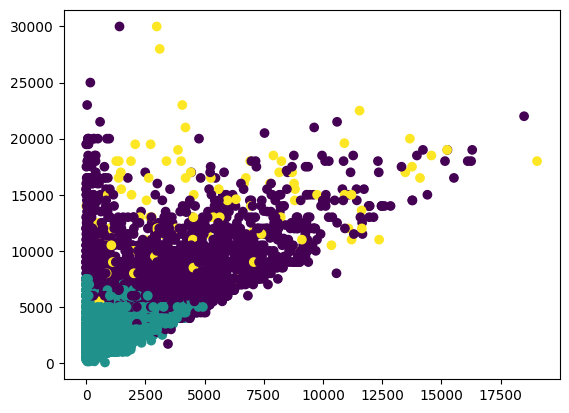

In [60]:
data2 = data.drop(columns=["CUST_ID"])
model = cluster.KMeans(init="k-means++", n_clusters=3, n_init=10)
fit = model.fit(data2)

data2["label"] = fit.labels_

plt.scatter(data2["BALANCE"], data2["CREDIT_LIMIT"], c=fit.labels_)

In [61]:
data2.groupby("label").describe()

BALANCE                                                                \
        count         mean          std       min          25%          50%   
label                                                                         
0      2294.0  3393.207503  2848.470781  0.000000   792.819739  3013.633956   
1      6522.0   854.830791   935.077632  0.000000    74.773347   535.285088   
2       134.0  4797.203573  3983.772125  4.382924  1580.555890  3453.316512   

                                 BALANCE_FREQUENCY            ...  \
               75%           max             count      mean  ...   
label                                                         ...   
0      5239.140344  18495.558550            2294.0  0.940501  ...   
1      1346.660508   4931.589653            6522.0  0.854389  ...   
2      7049.972675  19043.138560             134.0  0.908474  ...   

      PRC_FULL_PAYMENT       TENURE                                        \
                   75%  max   count       mean       std  min   25%   50%   
label                                                                       
0             0.083333  1.0  2294.0  11.738012  0.969564  6.0  12.0  12.0   
1             0.166667  1.0  6522.0  11.432996  1.444746  6.0  12.0  12.0   
2             0.595833  1.0   134.0  11.843284  0.821282  6.0  12.0  12.0   

                   
        75%   max  
label              
0      12.0  12.0  
1      12.0  12.0  
2      12.0  12.0  

[3 rows x 136 columns]

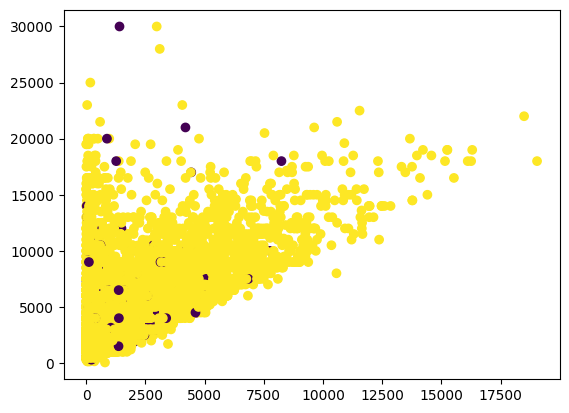

In [62]:
data2 = data.drop(columns=["CUST_ID"])
df = np.array(data2, dtype='float')
min_max_scaler = preprocessing.StandardScaler()
scaled_data = min_max_scaler.fit_transform(df)
scaled_data = normalize(scaled_data)

fit = cluster.DBSCAN().fit(scaled_data)

data2["label"] = fit.labels_

plt.scatter(data2["BALANCE"], data2["CREDIT_LIMIT"], c=fit.labels_)

In [63]:
data2.groupby("label").describe()

BALANCE                                                          \
        count         mean          std  min         25%          50%   
label                                                                   
-1      229.0  1590.816857  1377.380450  0.0  512.915157  1254.970145   
 0     8721.0  1563.783127  2096.887267  0.0  123.394089   862.753623   

                                 BALANCE_FREQUENCY            ...  \
               75%           max             count      mean  ...   
label                                                         ...   
-1     2241.092286   8248.178009             229.0  0.901155  ...   
 0     2043.788380  19043.138560            8721.0  0.876644  ...   

      PRC_FULL_PAYMENT       TENURE                                        \
                   75%  max   count       mean       std  min   25%   50%   
label                                                                       
-1            0.166667  1.0   229.0  11.419214  1.224307  6.0  11.0  12.0   
 0            0.142857  1.0  8721.0  11.519895  1.341162  6.0  12.0  12.0   

                   
        75%   max  
label              
-1     12.0  12.0  
 0     12.0  12.0  

[2 rows x 136 columns]